## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data 

#### Data set

In [2]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Basic statistics of the features

In [3]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Make boxplots by output labels/classes

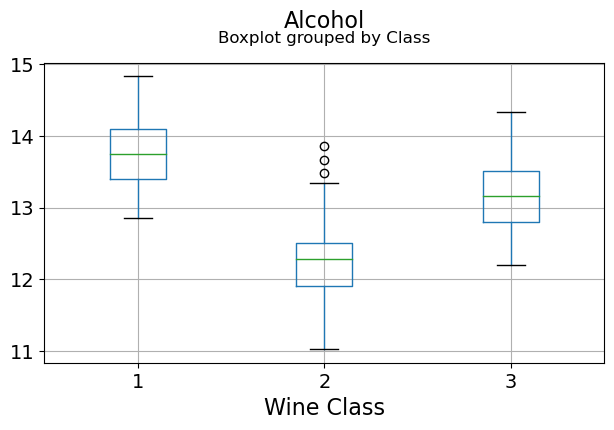

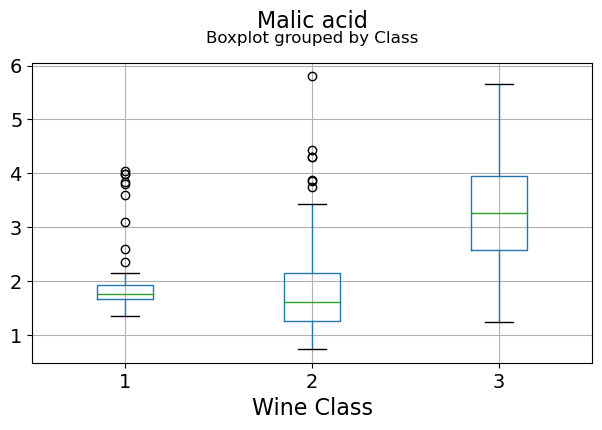

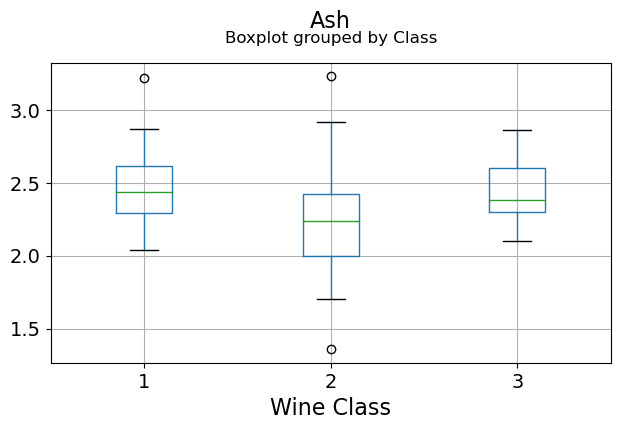

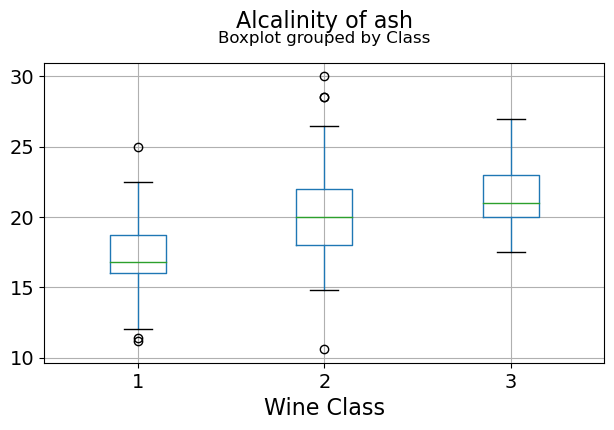

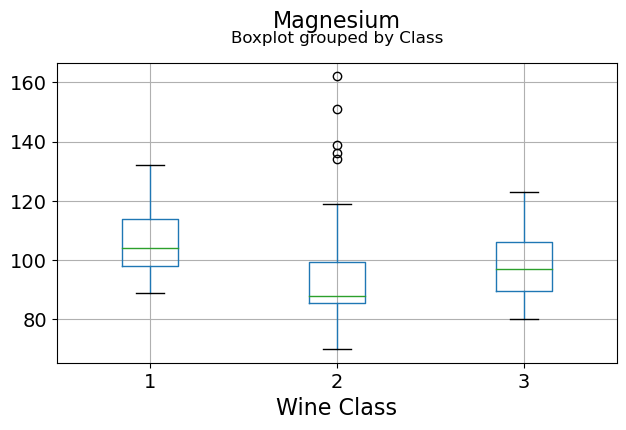

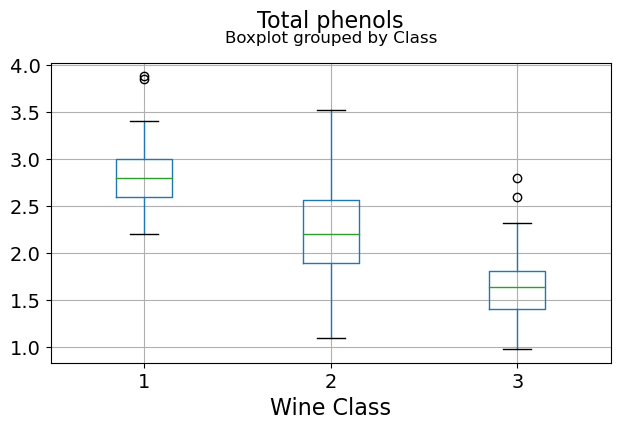

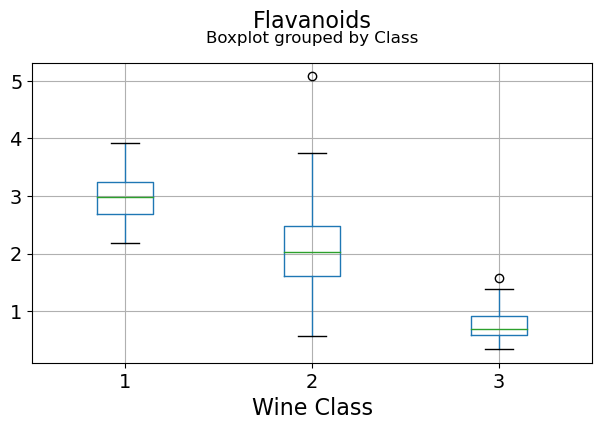

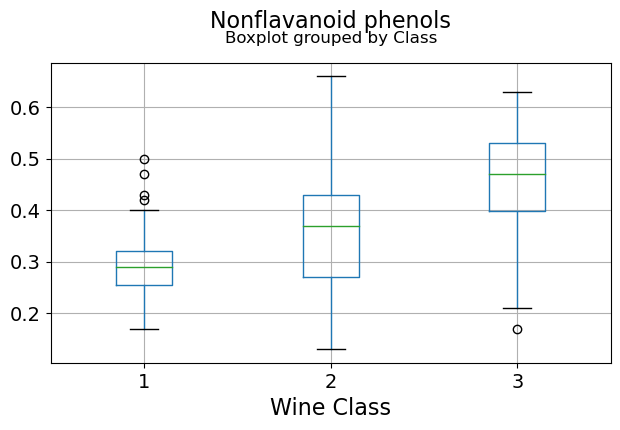

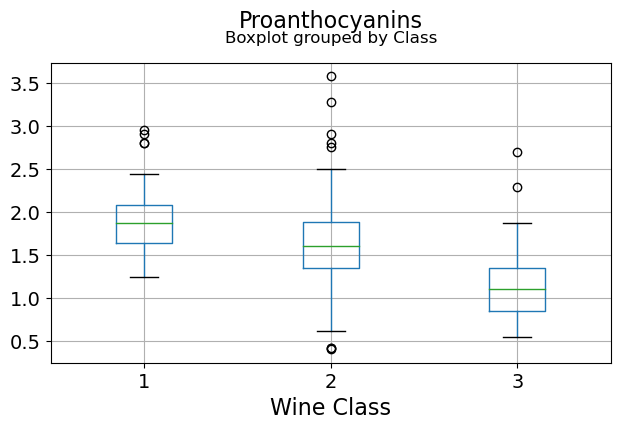

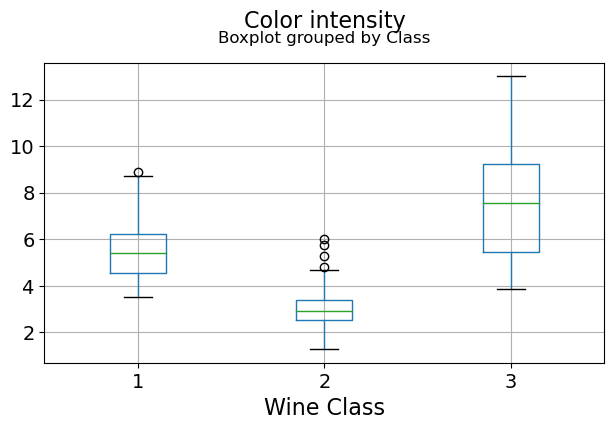

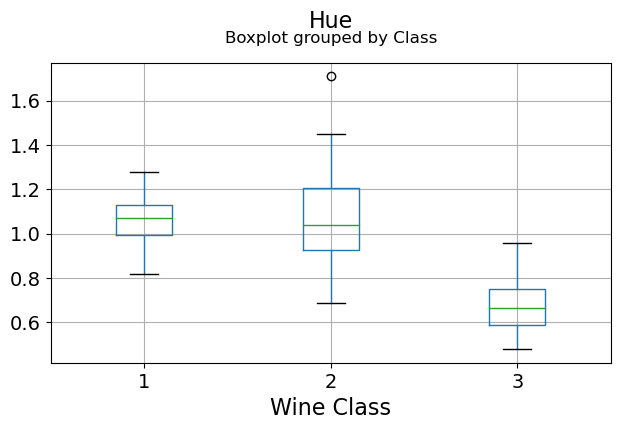

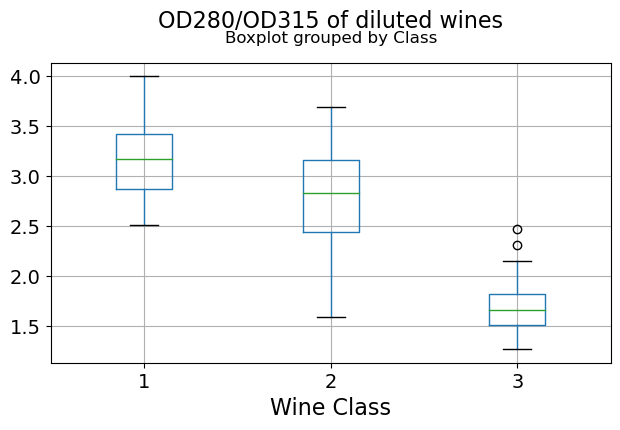

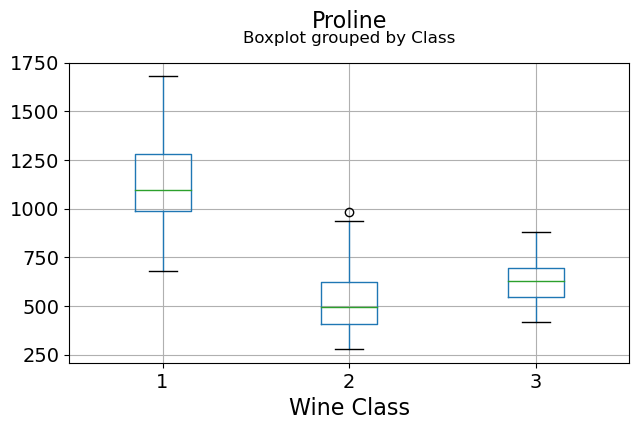

In [4]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

Text(0, 0.5, 'Flavanoids')

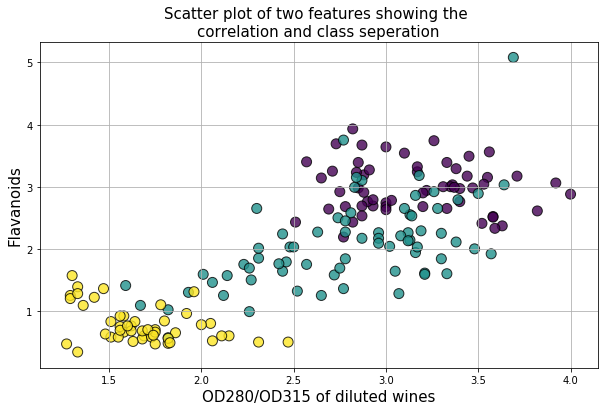

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='black',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.  

While you may not be able to make a plot like this from memory, my expectation that you are becoming literate in teh language enough to reproduce plots by wrangling your data into the appropriate format and looking at examples such as these:  [matplotlib](https://matplotlib.org/3.1.1/gallery/index.html)

/var/folders/nt/1sdg_y0x29q80l700xvb_x8m0000gn/T/ipykernel_64070/3804113536.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
/var/folders/nt/1sdg_y0x29q80l700xvb_x8m0000gn/T/ipykernel_64070/3804113536.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


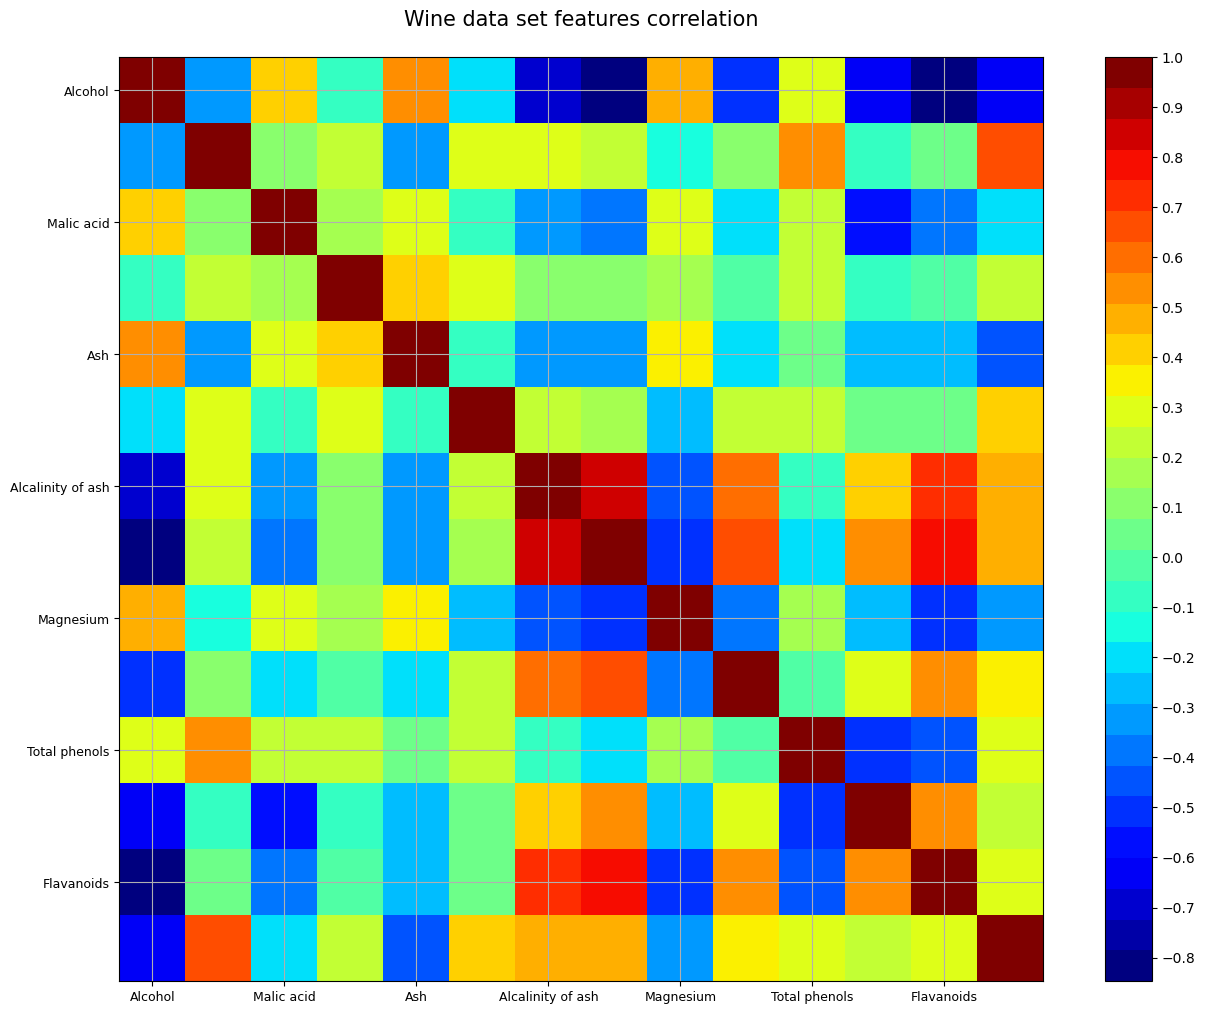

In [5]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)  #color schema
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

## Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.

Some advice:  Prior to classification, you should be able to clearly state what data is being predicted based on what data?  We will also need to build two datasets and they need to look a specific shape.  You will also need to split the dataset into a training and testing set.  



In [6]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [7]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [8]:
X_train.shape

(124, 13)

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [10]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285


#### Classification using GaussianNB

Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
y_train

177    3
169    3
5      1
40     1
58     1
      ..
80     2
38     1
0      1
140    3
35     1
Name: Class, Length: 124, dtype: int64

In [13]:
nbc = MultinomialNB()

In [14]:
nbc.fit(X_train, y_train)

MultinomialNB()

#### Prediction, classification report, and confusion matrix

In [15]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 54 test samples is 7


In [16]:
y_pred

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       1, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 3, 2, 1,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3])

In [17]:
X_test

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.250000,1.120,2.51,1105
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.100000,0.890,3.53,760
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.930,3.05,564
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.000000,0.930,3.69,465
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.400000,1.060,2.31,750
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.060000,0.940,2.44,415
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.900000,1.090,2.88,1515
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.500000,1.200,3.00,1547
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.200000,1.120,2.91,1150
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.400000,1.080,2.27,480


In [18]:
from sklearn.metrics import classification_report

In [19]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.91      0.83      0.87        24
           3       0.82      0.93      0.87        15

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.87      0.87      0.87        54



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3
Class 1,13,2,0
Class 2,1,20,1
Class 3,1,2,14



** This showed that even in the presence of corrletation among features, the Naive Bayes algorithm performed quite well and could seperate the classes easily ** 

In [22]:
# print message text for the false positives (ham incorrectly classified as spam)
print('false positives')
print(X_test[(y_pred == 1) & (y_test == 0)])
# equivalent way to performing the operation
# print(X_test[y_pred_class > y_test])


# print message text for the false negatives (spam incorrectly classified as ham)
print('\nfalse negatives')
print(X_test[y_pred < y_test])

# example false negative
#X_test[1875]

false positives
Empty DataFrame
Columns: [Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []

false negatives
     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
150    13.50        3.12  2.62               24.0        123           1.40   
70     12.29        1.61  2.21               20.4        103           1.10   
141    13.36        2.56  2.35               20.0         89           1.40   
130    12.86        1.35  2.32               18.0        122           1.51   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
150        1.57                  0.22             1.25             8.60   
70         1.02                  0.37             1.46             3.05   
141        0.50                  0.37             0.64             5.60   
130        1.25                  0.21             0.